In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# data preprocessing

In [7]:
# importing the data
from google.colab import files
uploaded = files.upload()

Saving test_set.csv to test_set.csv
Saving training_set.csv to training_set.csv


In [8]:
training_data = pd.read_csv('/content/training_set.csv')

In [9]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,03-11-2014,553.979065,556.372498,551.715271,553.699829,553.699829,1382285
1,04-11-2014,551.485901,553.979065,547.796021,552.592834,552.592834,1244207
2,05-11-2014,555.275513,555.275513,542.560425,544.425293,544.425293,2032264
3,06-11-2014,544.006409,545.387634,539.488831,540.555908,540.555908,1333250
4,07-11-2014,544.714478,544.714478,537.195129,539.528748,539.528748,1633773


In [10]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,24-10-2019,1260.900024,1264.000000,1253.714966,1260.989990,1260.989990,1028100
1253,25-10-2019,1251.030029,1269.599976,1250.010010,1265.130005,1265.130005,1213100
1254,28-10-2019,1275.449951,1299.310059,1272.540039,1290.000000,1290.000000,2613200
1255,29-10-2019,1276.229980,1281.589966,1257.212036,1262.619995,1262.619995,1886400
1256,30-10-2019,1252.969971,1269.359985,1252.000000,1261.290039,1261.290039,1408900


In [11]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1257 entries, 0 to 1256
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1257 non-null   object 
 1   Open       1257 non-null   float64
 2   High       1257 non-null   float64
 3   Low        1257 non-null   float64
 4   Close      1257 non-null   float64
 5   Adj Close  1257 non-null   float64
 6   Volume     1257 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [12]:
training_set = training_data.iloc[:,1:2].values # selecting only open column

In [34]:
print("Total observation in training set:",training_set.shape)
# print("Total observation in test data:",test_data.shape)

Total observation in training set: (1257, 1)


In [14]:
#Feature scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1)) #normalize value b/w 0 to 1
training_set_scaled = sc.fit_transform(training_set)#training set after feature scaling


In [15]:
training_set_scaled

array([[0.07750766],
       [0.07432328],
       [0.07916355],
       ...,
       [0.99900371],
       [1.        ],
       [0.97029124]])

# Creating a data structure with 60 timsteps and 1 output

- 60 timesteps is the training data for our RNN network and on the basis this 60 timesteps one o/p will be predicted

### `these 60 time steps are the past output and are used by RNN to train and learn correlation`


In [16]:

x_train =[]
y_train=[]

for i in range(60,1257): #60 is lower bound 1257 is ub
  x_train.append(training_set_scaled[i-60:i,0]) #in x_train we are appending 60 timesteps for each o/p
  #i-60 is lowerbound and upperbound is i--> In training set we have to select 60 timesteps for 1 output,therefor we use i-60
  # suppose i= 60. which means i-60--> 60-60=0 upper bound is i=60.
  # 0 is column index as we have only one column
  y_train.append(training_set_scaled[i,0]) # this is that one output of 60 timesteps mentioned above

# Since x-train and y_train are list we need to convert them into np array

x_train,y_train = np.array(x_train),np.array(y_train)

In [17]:
print("X train\n",x_train)
print('Y train\n',y_train)

X train
 [[0.07750766 0.07432328 0.07916355 ... 0.04498879 0.03583056 0.0208258 ]
 [0.07432328 0.07916355 0.06477013 ... 0.03583056 0.0208258  0.02701621]
 [0.07916355 0.06477013 0.0656745  ... 0.0208258  0.02701621 0.0472306 ]
 ...
 [0.90358069 0.86436929 0.85577344 ... 0.95673967 0.98041987 0.96781345]
 [0.86436929 0.85577344 0.8464367  ... 0.98041987 0.96781345 0.99900371]
 [0.85577344 0.8464367  0.88070516 ... 0.96781345 0.99900371 1.        ]]
Y train
 [0.02701621 0.0472306  0.04247951 ... 0.99900371 1.         0.97029124]


In [18]:
print("shape of x_train,:",x_train.shape)
print("shape of y_train,:",y_train.shape)

shape of x_train,: (1197, 60)
shape of y_train,: (1197,)


In [19]:
#reshaping the dataset as RNN takes data in 3-D
rows=1197
cols=60

x_train = x_train.reshape(rows,cols,1)

#1197 is the batch_size that is total number of observations 60 is number of timesteps that is number of cols and 1 is predictor(one google stock price)

In [20]:
print("shape of x_train,:",x_train.shape)

shape of x_train,: (1197, 60, 1)


# Building LSTM

In [21]:
#defining an object (initialising RNN)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.optimizers import Adam

#creating model
model = Sequential()

#First LSTM layers
model.add(LSTM(units=60,activation='relu',return_sequences=True,input_shape=(60,1)))
model.add(Dropout(0.2))

#units are number of cell or memory unit that we want to have in our lstm layer
#since we are going to add more LSTM layers we put "return_sequences=True", if we were to put dense layer after this we wouldn't have made "return_sequences=True"

#Second layer LSTM
model.add(LSTM(units = 60, activation='relu',return_sequences=True))
model.add(Dropout(0.2))

#Thrd lstm layer
model.add(LSTM(units = 60,activation='relu',return_sequences=True))
model.add(Dropout(0.2))

#Fourth LSTM layer
model.add(LSTM(units = 60,activation='relu'))
model.add(Dropout(0.2))

#we don't use return sequence because our  next layer is dense layer

In [22]:
# output  layer

model.add(Dense(units = 1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 60)            14880     
_________________________________________________________________
dropout (Dropout)            (None, 60, 60)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 60)            29040     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 60)                2

In [23]:
#compiling the model
model.compile(optimizer = 'adam',loss='mean_squared_error') 
#since we are dealing with regression we use mse. If we'd havve dealt with classification we'd have used binary_crossentropy

# Training the Model

In [24]:
model.fit(x_train,y_train,batch_size = 32, epochs=100)

Epoch 1/100
38/38 [==============================] - 18s 315ms/step - loss: 0.1963
Epoch 2/100
38/38 [==============================] - 12s 320ms/step - loss: 0.0136
Epoch 3/100
38/38 [==============================] - 12s 322ms/step - loss: 0.0094
Epoch 4/100
38/38 [==============================] - 12s 317ms/step - loss: 0.0090
Epoch 5/100
38/38 [==============================] - 12s 318ms/step - loss: 0.0077
Epoch 6/100
38/38 [==============================] - 12s 321ms/step - loss: 0.0077
Epoch 7/100
38/38 [==============================] - 12s 320ms/step - loss: 0.0080
Epoch 8/100
38/38 [==============================] - 12s 322ms/step - loss: 0.0071
Epoch 9/100
38/38 [==============================] - 12s 320ms/step - loss: 0.0069
Epoch 10/100
38/38 [==============================] - 12s 322ms/step - loss: 0.0068
Epoch 11/100
38/38 [==============================] - 12s 320ms/step - loss: 0.0058
Epoch 12/100
38/38 [==============================] - 12s 316ms/step - loss: 0.0065
E

In [25]:
model.save("GOOGLE_EPOCHS.h5")

In [26]:
#getting the real stock prices of month NOV 2019
test_data = pd.read_csv('/content/test_set.csv')

In [62]:
print(test_data)

          Date         Open         High  ...        Close    Adj Close   Volume
0   01-11-2019  1265.000000  1274.619995  ...  1273.739990  1273.739990  1670100
1   04-11-2019  1276.449951  1294.130005  ...  1291.369995  1291.369995  1501000
2   05-11-2019  1292.890015  1298.930054  ...  1292.030029  1292.030029  1282700
3   06-11-2019  1289.459961  1293.729980  ...  1291.800049  1291.800049  1153000
4   07-11-2019  1294.280029  1323.739990  ...  1308.859985  1308.859985  2030000
5   08-11-2019  1305.280029  1318.000000  ...  1311.369995  1311.369995  1251400
6   11-11-2019  1303.180054  1306.425049  ...  1299.189941  1299.189941  1011900
7   12-11-2019  1300.000000  1310.000000  ...  1298.800049  1298.800049  1085900
8   13-11-2019  1294.069946  1304.300049  ...  1298.000000  1298.000000   826700
9   14-11-2019  1297.500000  1317.000000  ...  1311.459961  1311.459961  1193500
10  15-11-2019  1318.939941  1334.880005  ...  1334.869995  1334.869995  1782600
11  18-11-2019  1332.219971 

In [28]:
test_data.shape

(20, 7)

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       20 non-null     object 
 1   Open       20 non-null     float64
 2   High       20 non-null     float64
 3   Low        20 non-null     float64
 4   Close      20 non-null     float64
 5   Adj Close  20 non-null     float64
 6   Volume     20 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ KB


In [30]:
real_stock_price = test_data.iloc[:,1:2].values #only selecting Open column

In [31]:
real_stock_price

array([[1265.      ],
       [1276.449951],
       [1292.890015],
       [1289.459961],
       [1294.280029],
       [1305.280029],
       [1303.180054],
       [1300.      ],
       [1294.069946],
       [1297.5     ],
       [1318.939941],
       [1332.219971],
       [1327.699951],
       [1311.73999 ],
       [1301.47998 ],
       [1305.619995],
       [1299.180054],
       [1309.859985],
       [1315.      ],
       [1307.119995]])

In [38]:
real_stock_price.shape

(20, 1)

In [49]:
#predicting the stock prices for month nov 2019


#Concatination
dataset_total = pd.concat([training_data['Open'],test_data['Open']],axis=0) 
#we concatinate on the basis of rows and not columns hence we've used axis =0 

#Selecting 60 stock prices for each day for predicting data for Nov 2019

#Note - In dataset_total we have observations from both trainig set(2014-2019) and test set(nov 2019)

inputs  = dataset_total[len(dataset_total)-len(test_data)-60:].values


#doing this len(dataset_total)-len(test_data)-60 gives previous 60 stock prices for the first day of november 2019 
# after that we have added ":" so that we get data for whole month

#converting inputs dataframe to np array

inputs = inputs.reshape(-1,1)

#feature scaling

inputs = sc.transform(inputs)

print(inputs)




[[0.8464367 ]
 [0.88070516]
 [0.90006826]
 [0.87608154]
 [0.86618288]
 [0.87237765]
 [0.85601605]
 [0.87651591]
 [0.88997798]
 [0.89656862]
 [0.89388643]
 [0.8950614 ]
 [0.87963232]
 [0.84804604]
 [0.87776759]
 [0.85372973]
 [0.87852112]
 [0.90071967]
 [0.87329723]
 [0.87288842]
 [0.8918173 ]
 [0.91301956]
 [0.90774452]
 [0.89644092]
 [0.90699099]
 [0.93367269]
 [0.94267718]
 [0.94033987]
 [0.94146386]
 [0.9377726 ]
 [0.94358413]
 [0.94493793]
 [0.93584394]
 [0.95372539]
 [0.92284151]
 [0.95622874]
 [0.95756992]
 [0.92941936]
 [0.92690322]
 [0.89877823]
 [0.87709061]
 [0.89227709]
 [0.90825545]
 [0.89955733]
 [0.9018053 ]
 [0.90082179]
 [0.93100313]
 [0.91839671]
 [0.92869139]
 [0.95521983]
 [0.96768576]
 [0.97091708]
 [0.96938444]
 [0.96375174]
 [0.95673967]
 [0.98041987]
 [0.96781345]
 [0.99900371]
 [1.        ]
 [0.97029124]
 [0.98565655]
 [1.00028096]
 [1.02127897]
 [1.01689794]
 [1.02305436]
 [1.03710407]
 [1.03442188]
 [1.03036017]
 [1.02278603]
 [1.02716706]
 [1.05455114]
 [1.07

In [56]:
#creating a test set
x_test = []

for i in range(60,80): #LB=60 and UB = 80. previous 60 stock prices and total of 20 set in test_set therefore 60+20,UB=80 
  x_test.append(inputs[i-60:i,0]) #consider i=60 therefore  LB=0 and UB=60, 0 is column index

#Converting into np array
x_test = np.array(x_test)

#converting into 3D
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

print("x_test\n",x_test)
print("Shape of x_test:",x_test.shape)


x_test
 [[[0.8464367 ]
  [0.88070516]
  [0.90006826]
  ...
  [0.99900371]
  [1.        ]
  [0.97029124]]

 [[0.88070516]
  [0.90006826]
  [0.87608154]
  ...
  [1.        ]
  [0.97029124]
  [0.98565655]]

 [[0.90006826]
  [0.87608154]
  [0.86618288]
  ...
  [0.97029124]
  [0.98565655]
  [1.00028096]]

 ...

 [[0.90071967]
  [0.87329723]
  [0.87288842]
  ...
  [1.03225047]
  [1.03753829]
  [1.0293129 ]]

 [[0.87329723]
  [0.87288842]
  [0.8918173 ]
  ...
  [1.03753829]
  [1.0293129 ]
  [1.0429538 ]]

 [[0.87288842]
  [0.8918173 ]
  [0.91301956]
  ...
  [1.0293129 ]
  [1.0429538 ]
  [1.04951887]]]
Shape of x_test: (20, 60, 1)


## Getting Predicted Stock Prices

In [48]:
predicted_stock_price = model.predict(x_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [64]:
print("predicted price for 1 nov :",predicted_stock_price[0])
print("Real price for 1 Nov:",real_stock_price[0])

predicted price for 1 nov : [1247.9404]
Real price for 1 Nov: [1265.]


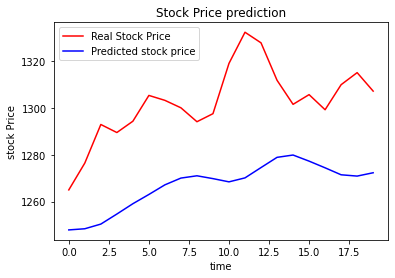

In [66]:
# Visualisation

plt.plot(real_stock_price,'r',label='Real Stock Price')
plt.plot(predicted_stock_price,'b',label='Predicted stock price')
plt.legend()

plt.title('Stock Price prediction')
plt.xlabel('time')
plt.ylabel('stock Price')
plt.show()